#Employee Performance & Attrition Analysis using HR Analytics
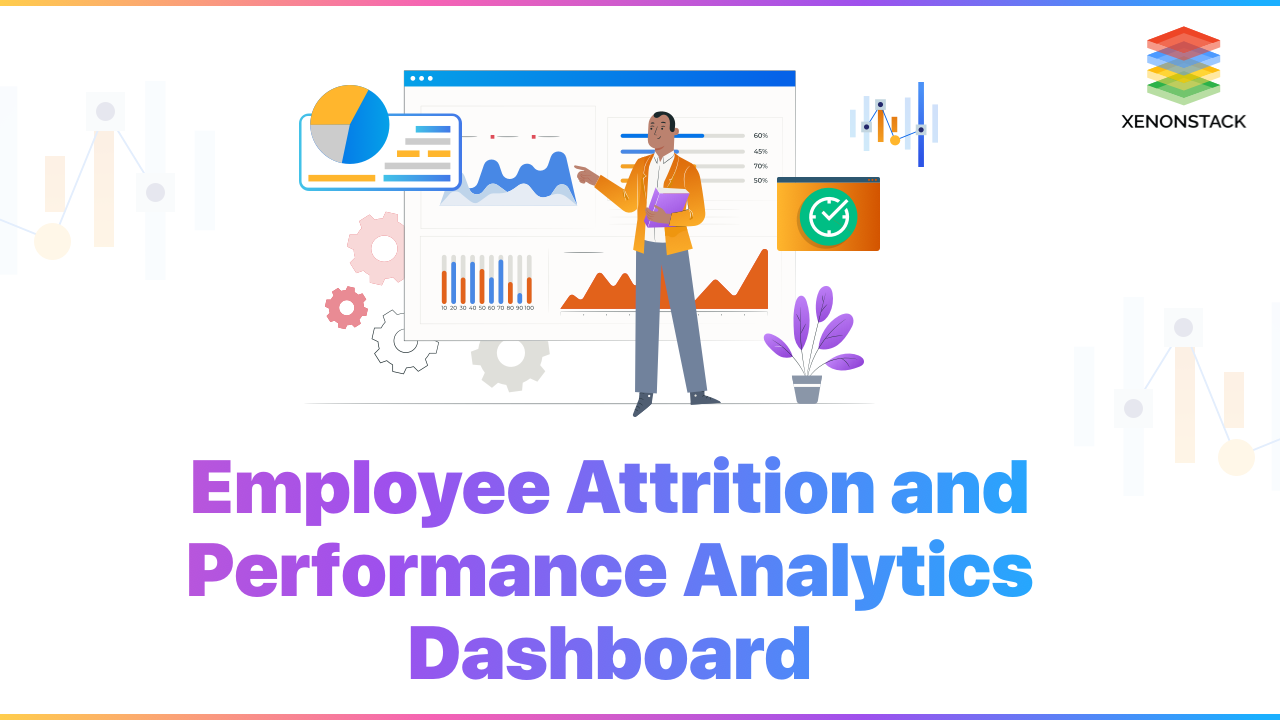

#Install & Imports the neccessary libraries

In [ ]:
!pip install -q scikit-learn xgboost imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

#Load Dataset

In [ ]:
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"  # Change if needed
df = pd.read_csv(file_path)

In [ ]:
print("\nData Shape:", df.shape)


Data Shape: (1470, 35)


In [ ]:
print("\nColumns:", df.columns)


Columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
print("\nSample Data:")


Sample Data:


In [ ]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

#Data Cleaning & Encoding

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
print("\nData Types After Encoding:\n", df.dtypes)


Data Types After Encoding:
 Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears  

#Exploratory Data Analysis (EDA)

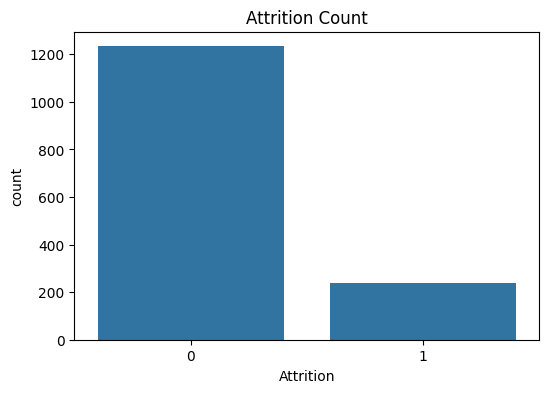

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

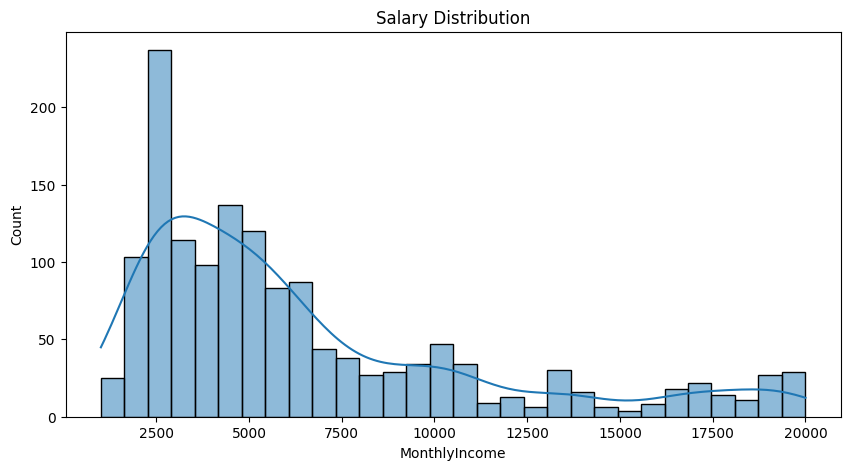

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

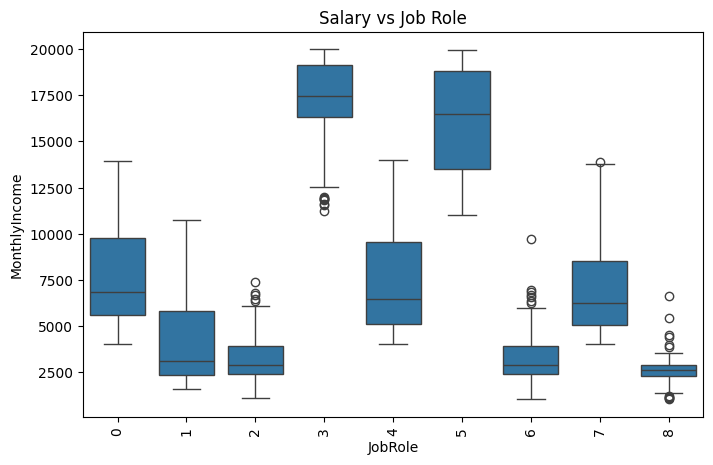

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.xticks(rotation=90)
plt.title("Salary vs Job Role")
plt.show()

#Correlation heatmap

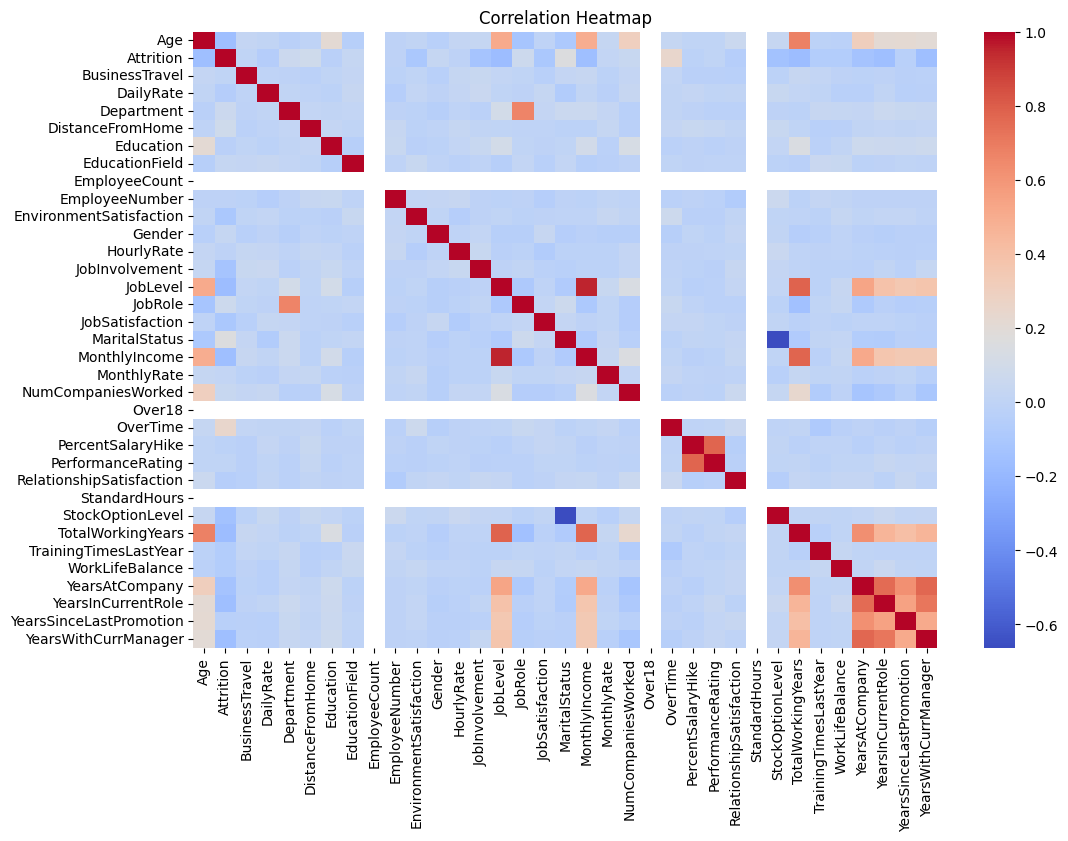

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

#Feature & Target

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Handle imbalance using SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#Train-Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


#Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Training

In [ ]:
print("\n===== Random Forest Model =====")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


===== Random Forest Model =====
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       250
           1       0.92      0.90      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [ ]:
print("\n===== XGBoost Model =====")
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


===== XGBoost Model =====
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       250
           1       0.93      0.93      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



#Feature Importance

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

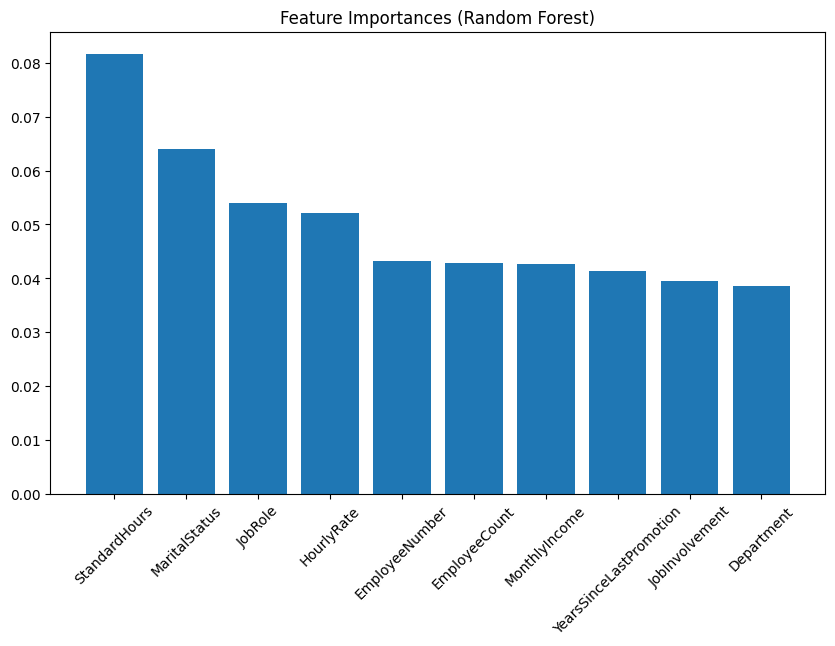

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [df.columns[i] for i in indices[:10]], rotation=45)
plt.show()

#Save Outputs

In [ ]:
df.to_csv("/content/processed_hr_data.csv", index=False)
print("\nProcessed data saved: processed_hr_data.csv")


Processed data saved: processed_hr_data.csv
